<a href="https://colab.research.google.com/github/juborduchi/fundamentos/blob/main/notebooks/analise_dados_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# análise e visualização de dados

## importação de programas
o código abaixo indica os programas e bibliotecas que serão usados neste arquivo

In [1]:
import json
import os
import numpy as np
import pandas as pd
import plotly.express as px

## Acesso ao google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## localização dos arquivos


In [3]:
caminho_padrao = "/content/gdrive/MyDrive" # comum a todos os usuários
caminho_especifico = "/Colab_Notebooks/bases_dados/" #caminho especifico de cada usuário
nome_arquivo = "BD_BRASIL_GOVFEDERAL_BIBLIOTECA_PRESIDENCIA-bolsonaro-discursos_05.json"
caminho_pasta_arquivos = caminho_padrao + caminho_especifico
caminho_completo = caminho_padrao + caminho_especifico + nome_arquivo


## acessando as informações dos arquivos

In [4]:
dataset = pd.read_json(caminho_completo, orient="columns")
df = pd.json_normalize(dataset["_default"])
df.shape

(611, 31)

In [5]:
df.columns


Index(['tipo_dado', 'pais', 'origem', 'sigla', 'classificado', 'categoria',
       'autoria', 'horario', 'data_atualizado', 'horario_atualizado', 'link',
       'link_archive', 'data_archive', 'horario_archive', 'local', 'tags',
       'titulo', 'subtitulo', 'data', 'edicao', 'editor', 'paragrafos',
       'nome_arquivo', 'imagens', 'dir_bd', 'dir_arquivo', 'codigo_bd',
       'nome_bd_json', 'env_dir_bd', 'extra_01', 'extra_02'],
      dtype='object')

In [6]:
df_customizado = df[["data","titulo","paragrafos", "link"]]
df_customizado

,data,titulo,paragrafos,link
0,21/02/2022,"Discurso do Presidente da República, Jair Bols...","[Boa tarde a todos., Se me permitem, muitos ou...",http://www.biblioteca.presidencia.gov.br/presi...
1,22/02/2022,"Discurso do Presidente da República, Jair Bols...","[Bom dia a todos., Uma satisfação muito grande...",http://www.biblioteca.presidencia.gov.br/presi...
2,23/02/2022,"Discurso do Presidente da República, Jair Bols...",[O general Heleno também é 01 da Escola de Edu...,http://www.biblioteca.presidencia.gov.br/presi...
3,23/02/2022,"Discurso do Presidente da República, Jair Bols...","[Boa tarde a todos,, É uma satisfação muito gr...",http://www.biblioteca.presidencia.gov.br/presi...
4,24/02/2022,"Discurso do Presidente da República, Jair Bols...","[Bom dia a todos., Não tem satisfação maior do...",http://www.biblioteca.presidencia.gov.br/presi...
...,...,...,...,...
606,02/12/2019,"Discurso do Presidente da República, Jair Bols...",[Alguns dizem que eu não sou inteligente. Poss...,http://www.biblioteca.presidencia.gov.br/presi...
607,03/12/2019,"Discurso do Presidente da República, Jair Bols...","[Eu estou me sentindo em casa, porque é do cap...",http://www.biblioteca.presidencia.gov.br/presi...
608,05/12/2019,"Discurso do Presidente da República, Jair Bols...","[Bom dia., Senhoras e senhores chefes de deleg...",http://www.biblioteca.presidencia.gov.br/presi...
609,08/12/2020,"Discurso do Senhor Presidente da República, Ja...",[Se a sombra não nasceu para poucos a chuva si...,http://www.biblioteca.presidencia.gov.br/presi...


In [7]:
df_customizado.dtypes

,0
data,object
titulo,object
paragrafos,object
link,object


## Normanização

## quantos discursos por ano?

In [8]:
df_customizado ["data"] = pd.to_datetime (df_customizado["data"], format = "%d/%m/%Y", errors = "coerce")
df_customizado.dtypes

<ipython-input-8-a3bca298bc77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customizado ["data"] = pd.to_datetime (df_customizado["data"], format = "%d/%m/%Y", errors = "coerce")


,0
data,datetime64[ns]
titulo,object
paragrafos,object
link,object


In [9]:
df_customizado ["ano"] = pd.to_datetime (df_customizado["data"]).dt.year
discurso_por_ano = df_customizado ["ano"].value_counts().sort_index()
discurso_por_ano

<ipython-input-9-a5a7f05a38e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customizado ["ano"] = pd.to_datetime (df_customizado["data"]).dt.year


,count
ano,
2019,204
2020,130
2021,160
2022,117


In [10]:
grafico_discurso_por_ano = px.bar(discurso_por_ano)
grafico_discurso_por_ano

## Busca por palavra chave no título

In [11]:
palavra_chave = input("escreva uma palavra chave: ")
print(palavra_chave)
print(type(palavra_chave) )
titulo = df_customizado[df_customizado["titulo"].str.contains(palavra_chave, case=False)]
titulo

escreva uma palavra chave: brasil
brasil
<class 'str'>


,data,titulo,paragrafos,link,ano
0,2022-02-21,"Discurso do Presidente da República, Jair Bols...","[Boa tarde a todos., Se me permitem, muitos ou...",http://www.biblioteca.presidencia.gov.br/presi...,2022
1,2022-02-22,"Discurso do Presidente da República, Jair Bols...","[Bom dia a todos., Uma satisfação muito grande...",http://www.biblioteca.presidencia.gov.br/presi...,2022
9,2022-03-08,"Discurso do Presidente da República, Jair Bols...","[Primeiro, senhores militares, se dependêssemo...",http://www.biblioteca.presidencia.gov.br/presi...,2022
17,2022-03-22,"Discurso do Presidente da República, Jair Bols...",[Boa tarde a todos. Amigos de Porto Nacional e...,http://www.biblioteca.presidencia.gov.br/presi...,2022
25,2022-04-01,"Discurso do Presidente da República, Jair Bols...","[Bom dia a todos, senhores comandantes, senhor...",http://www.biblioteca.presidencia.gov.br/presi...,2022
...,...,...,...,...,...
572,2019-06-13,"Discurso do Presidente da República, Jair Bols...",[É muito bom estar entre amigos. (...) melhor...,http://www.biblioteca.presidencia.gov.br/presi...,2019
573,2019-06-15,"Discurso do Presidente da República, Jair Bols...",[É muito bom integrar o Exército Brasileiro. M...,http://www.biblioteca.presidencia.gov.br/presi...,2019
575,2019-06-18,"Discurso do Presidente da República, Jair Bols...",[A Tereza Cristina foi mais rápida que o Onyx ...,http://www.biblioteca.presidencia.gov.br/presi...,2019
576,2019-06-19,"Discurso do Presidente da República, Jair Bols...","[É muito bom retornar a minha terra natal, a m...",http://www.biblioteca.presidencia.gov.br/presi...,2019


In [12]:
palavra_chave_ano = titulo["titulo"].groupby(titulo["data"].dt.year).count()
quantidade = palavra_chave_ano.values.tolist()
print(quantidade)
print(type(quantidade[0]))
anos_int = palavra_chave_ano.index.tolist()
anos = [str (ano) for ano in anos_int]
print(quantidade, anos)

[31, 15, 21, 18]
<class 'int'>
[31, 15, 21, 18] ['2019', '2020', '2021', '2022']


In [13]:
grafico = px.bar(x=anos, y=quantidade, labels={
    "x":"anos",
    "y":"quantidade"
})
grafico

# Parágrafos

## Quais discursos apresentam determinada palavra/termo(palavra-composta)

In [14]:
from collections import Counter
lista_termos = ["mulher", "brics", "nomades", "mercosul", "onu", "nações unidas", "estados unidos", "g20"]

def contar_palavras(texto,lista_termos):
  ##unir todos os parágrafos em uma unica string
  paragrafos = " ".join(texto)

  contador = Counter()
  for palavra in lista_termos:
    contador[palavra] = paragrafos.lower().count(palavra.lower())
  return contador

## aplicar/chamar a função contar_palavras a coluna de paragrafos e somar as ocorrências
## [lista_paragrafo01, lista_paragrafo02, lista_paragrafo03]
frequencias_totais = Counter()
for texto in df_customizado['paragrafos']:
  frequencias_totais += contar_palavras(texto,lista_termos) ## chamando a função contar_palavras e tendo como retorno a contagem dos termos listados

frequencias_totais


Counter({'mulher': 266,
         'onu': 66,
         'estados unidos': 146,
         'g20': 25,
         'brics': 94,
         'nações unidas': 27,
         'mercosul': 112})

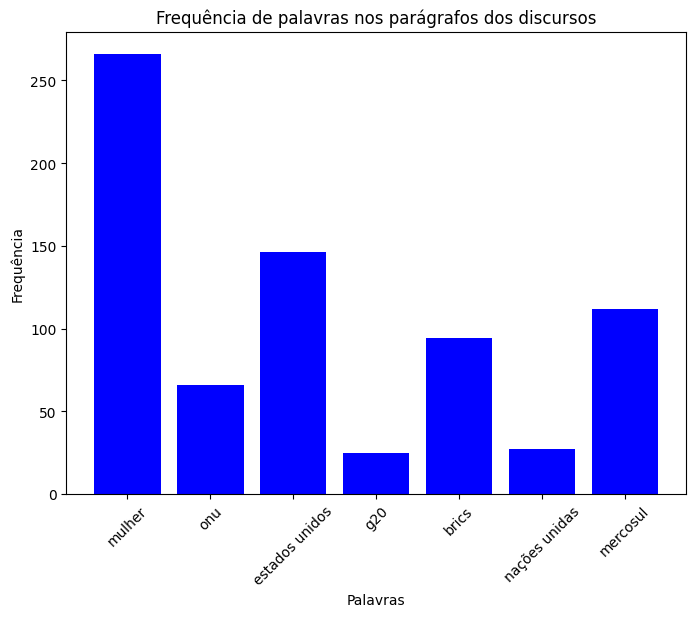

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.bar(frequencias_totais.keys(),frequencias_totais.values(), color="blue")
plt.xlabel("Palavras")
plt.ylabel("Frequência")
plt.title("Frequência de palavras nos parágrafos dos discursos")
plt.xticks(rotation=45)
plt.show()

##Quais são as palavras mais frequentes

In [32]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
def palavras_mais_frequentes(paragrafos):
  ## banco de stop words
  nltk.download("stopwords")
  ## carregar stop words em português
  stop_words = set(stopwords.words("portuguese"))
  ## unindo todos os parágrafos em uma única string
  texto_completo = " ".join(paragrafos)
  ## removendo pontuações e deixando todas as palavras minusculas
  texto_normalizado = re.sub(r"[^\w\s]","",texto_completo).lower()
  ##
  palavras = texto_normalizado.split()
  ##
  palavras_extras = {"aqui"}
  stop_words.update(palavras_extras)
  palavras_filtradas = [palavra for palavra in palavras if palavra not in stop_words]

  return palavras_filtradas



todas_palavras = []
for paragrafos in df_customizado["paragrafos"]:
  todas_palavras.extend(palavras_mais_frequentes(paragrafos))

frequencia_palavras = Counter(todas_palavras)
frequencia_palavras.most_common(10)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /ro

[('brasil', 4795),
 ('todos', 2936),
 ('lá', 1894),
 ('bem', 1800),
 ('porque', 1639),
 ('deus', 1458),
 ('governo', 1415),
 ('agora', 1401),
 ('gente', 1396),
 ('presidente', 1386)]